In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import geopandas as gpd

In [33]:
income_2016_path = r'./Data/income/2016_renda_neta_mitjana_per_persona.csv'
income_2017_path = r'./Data/income/2017_renda_neta_mitjana_per_persona.csv'
income_2018_path = r'./Data/income/2018_renda_neta_mitjana_per_persona.csv'
income_2019_path = r'./Data/income/2019_renda_neta_mitjana_per_persona.csv'
income_2020_path = r'./Data/income/2020_renda_neta_mitjana_per_persona.csv'

# Import of the files using pandas
# Import income data
income_2016 = pd.read_csv(income_2016_path)
income_2017 = pd.read_csv(income_2017_path)
income_2018 = pd.read_csv(income_2018_path)
income_2019 = pd.read_csv(income_2019_path)
income_2020 = pd.read_csv(income_2020_path)

#Solving dataframe issues
income_2016.rename(columns={'Import_Euros ':'Import_Euros'},inplace=True)
income_2017.rename(columns={'Import_Euros ':'Import_Euros'},inplace=True)
income_2018.rename(columns={'Import_Euros ':'Import_Euros'},inplace=True)
income_2018.columns

Index(['Any', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri',
       'Seccio_Censal', 'Import_Euros'],
      dtype='object')

In [34]:
incomearray=[income_2016,income_2017,income_2018,income_2019,income_2020]
income_df=pd.concat(incomearray)

In [61]:
#We erase the column about secció censal and merge all the rows from the same neighbourhood
income_df.drop('Seccio_Censal', axis=1)
income_df_refined=income_df.groupby('Nom_Barri').agg({'Import_Euros': 'sum'}).reset_index()
income_df_refined.columns

Index(['Nom_Barri', 'Import_Euros'], dtype='object')

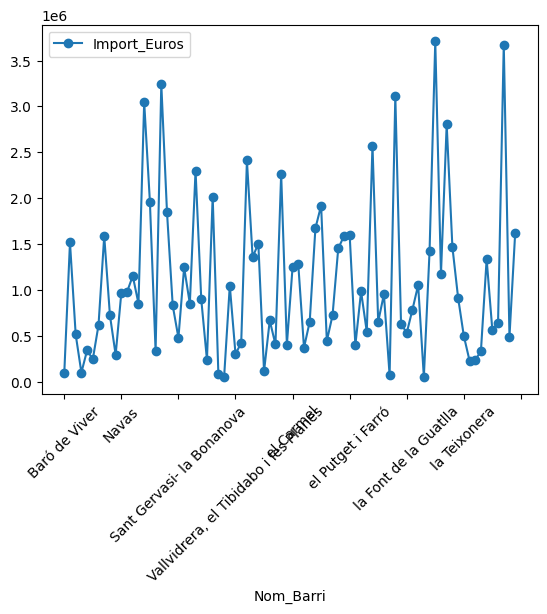

In [66]:
income_df_refined.plot(x='Nom_Barri', y='Import_Euros', kind='line', marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.show()